In [2]:
import pandas as pd

FILEPATH = r"C:\Users\nehas\OneDrive\Desktop\1730285881-Airbnb_Open_Data.xlsx"

df=pd.read_excel(FILEPATH)
for k, v in df.items():
    print('df: ' + k)
    print(v.head(15))

df: id
0     1001254
1     1002102
2     1002403
3     1002755
4     1003689
5     1004098
6     1004650
7     1005202
8     1005754
9     1006307
10    1006859
11    1007411
12    1007964
13    1008516
14    1009068
Name: id, dtype: int64
df: NAME
0                   Clean & quiet apt home by the park
1                                Skylit Midtown Castle
2                  THE VILLAGE OF HARLEM....NEW YORK !
3                                                  NaN
4     Entire Apt: Spacious Studio/Loft by central park
5            Large Cozy 1 BR Apartment In Midtown East
6                                      BlissArtsSpace!
7                                      BlissArtsSpace!
8                      Large Furnished Room Near B'way
9                   Cozy Clean Guest Room - Family Apt
10                  Cute & Cozy Lower East Side 1 bdrm
11                    Beautiful 1br on Upper West Side
12                     Central Manhattan/near Broadway
13      Lovely Room 1, Garden, Best 

neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
dtype: int64
neighbourhood group
Queens           630.207647
Bronx            627.766359
Brooklyn         626.562193
Staten Island    624.490546
Manhattan        622.440227
Name: price, dtype: float64


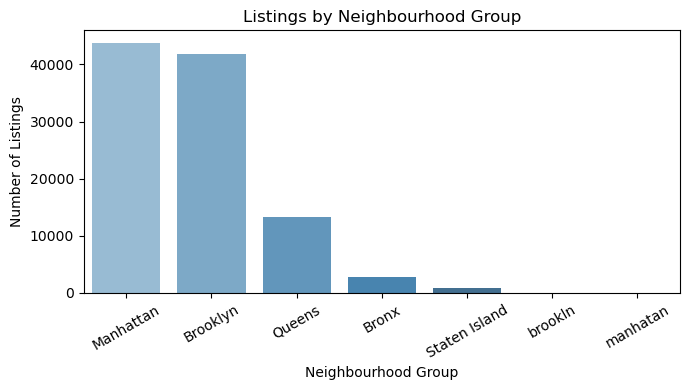

Computed listing counts and average prices, and displayed two plots


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Clean column names to consistent lowercase for ease
df.columns = [c.strip().lower() for c in df.columns]

# Ensure price numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Group by neighbourhood group
counts = df.groupby('neighbourhood group').size().sort_values(ascending=False)
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)

print(counts.head())
print(avg_price.head())

# which neighbourhood group has the highets number of listings?
plt.figure(figsize=(7,4))
sns.barplot(x=counts.index, y=counts.values, palette='Blues_d')
plt.title('Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

print('Computed listing counts and average prices, and displayed two plots')

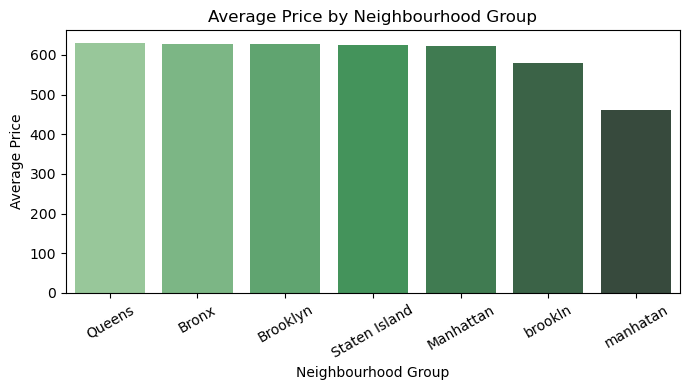

In [6]:
# which neighbouhood groups has the highest average prices for airnb listings?
plt.figure(figsize=(7,4))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='Greens_d')
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

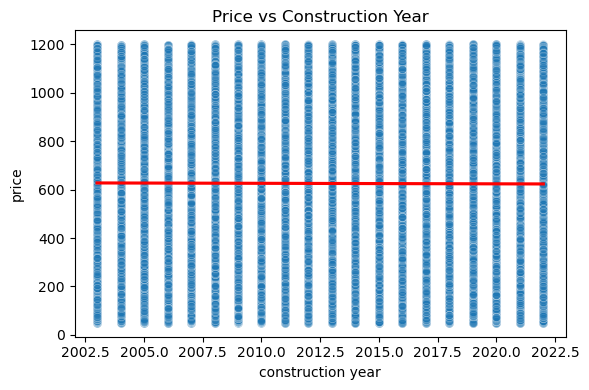

In [8]:
#is there a relationship between the construction year of property and price?
try:
    df
except NameError:
    df = pd.read_excel('VOIS PROJECT DATASET.xlsx', sheet_name='in')

# Clean columns
df.columns = [c.strip().lower() for c in df.columns]

# Coerce numeric fields
num_cols = ['construction year','price','service fee','review rate number','calculated host listings count','availability 365']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# 1) Construction year vs price
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='construction year', y='price', alpha=0.3)
sns.regplot(data=df, x='construction year', y='price', scatter=False, color='red')
plt.title('Price vs Construction Year')
plt.tight_layout()
plt.show()

host name
Blueground      332.0
Sonder (NYC)    327.0
Eugene          218.0
Karen           208.0
Jeniffer        186.0
Soya            171.0
Kaz             161.0
Hiroki          152.0
Momoyo          126.0
Shogo           125.0
Name: calculated host listings count, dtype: float64


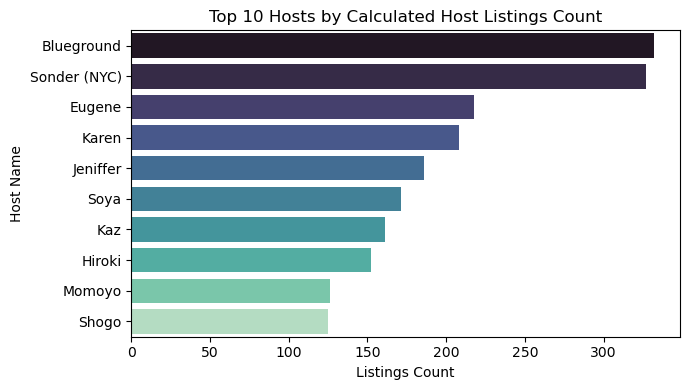

In [10]:
# 2) Top 10 hosts by calculated host listings count
host_counts = df.groupby('host name')['calculated host listings count'].max().sort_values(ascending=False).head(10)
print(host_counts)
plt.figure(figsize=(7,4))
sns.barplot(x=host_counts.values, y=host_counts.index, palette='mako')
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.xlabel('Listings Count')
plt.ylabel('Host Name')
plt.tight_layout()
plt.show()

host_identity_verified
verified       0.457640
unconfirmed    0.452754
Name: positive_review, dtype: float64


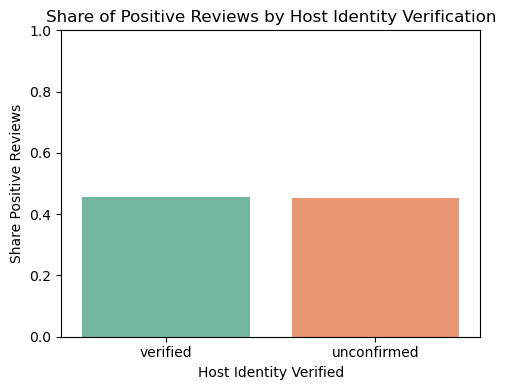

In [12]:
# 3) Verified identity vs positive reviews (>=4)
import numpy as np
if 'host_identity_verified' in df.columns:
    df['positive_review'] = np.where(df['review rate number'] >= 4, 1, 0)
    id_rate = df.groupby('host_identity_verified')['positive_review'].mean().sort_values(ascending=False)
    print(id_rate)
    plt.figure(figsize=(5,4))
    sns.barplot(x=id_rate.index.astype(str), y=id_rate.values, palette='Set2')
    plt.title('Share of Positive Reviews by Host Identity Verification')
    plt.xlabel('Host Identity Verified')
    plt.ylabel('Share Positive Reviews')
    plt.ylim(0,1)
    plt.tight_layout()
    plt.show()

0.9999908755543448


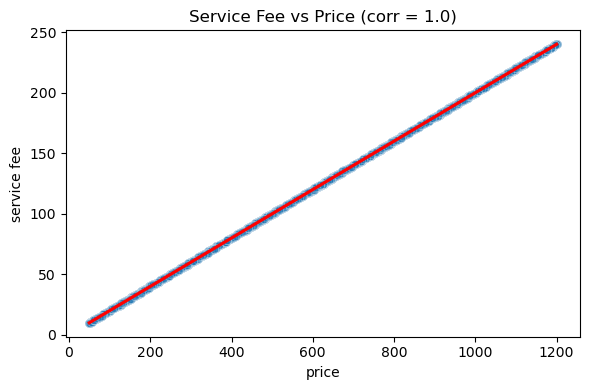

In [14]:
# 4) Price vs service fee correlation
corr_val = df[['price','service fee']].corr().iloc[0,1]
print(corr_val)
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='price', y='service fee', alpha=0.3)
sns.regplot(data=df, x='price', y='service fee', scatter=False, color='red')
plt.title('Service Fee vs Price (corr = ' + str(round(corr_val, 3)) + ')')
plt.tight_layout()
plt.show()

room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx                       3.346457         NaN      3.329706     3.264957
Brooklyn                    3.250378        3.75      3.264465     3.336983
Manhattan                   3.275807        3.50      3.277576     3.257459
Queens                      3.349154        3.75      3.315585     3.377778
Staten Island               3.329087         NaN      3.479482     3.533333


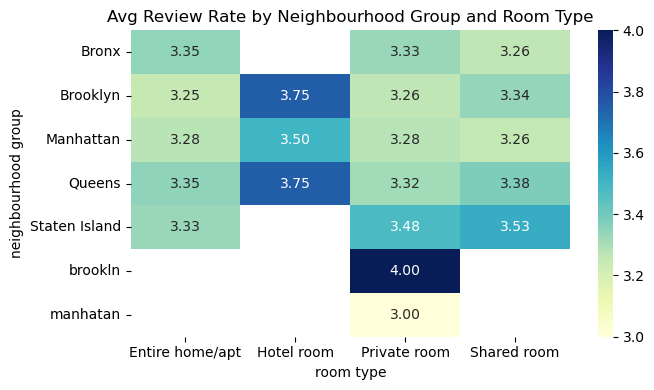

In [16]:
# 5) Avg review rate number by neighbourhood group and room type
pivot_rt = df.pivot_table(index='neighbourhood group', columns='room type', values='review rate number', aggfunc='mean')
print(pivot_rt.head())
plt.figure(figsize=(7,4))
sns.heatmap(pivot_rt, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Avg Review Rate by Neighbourhood Group and Room Type')
plt.tight_layout()
plt.show()